#  Intuition behind Bayesian inference

<br><br>The goal of this notebook is to provide an intuitive explanation of Bayesian inference with the aid of both theoretical description and simulations. Let's write down directly the Bayes formula.

$$ P(\theta \mid X) = \frac{P(X \mid \theta) \, P(\theta)}{P(X)} $$

***

The Bayes formula is made up of of four components as follows.

- $
P(\theta \mid X):
$ Postrior, which is the probability of parameters $ \theta $ given the observation $ X$

- $
P(\theta):
$ Prior, which is the prior probability (initial belief) of parameters $ \theta $

- $
P(X \mid \theta):
$ Likelihood, which is the probability of obsevation $X$ given parameter $\theta$.

- $
P(X):
$ Evidence, which is the probability of obsevation $X$.


In other words, it can be written as follows.

$$
\begin{align*}
Postrior = \frac{Likelihood \times Prior}{Evidence}
\end{align*}
$$

<p style="text-align: justify"> A critical fact to understand is that both posterior and prior calculate the probability of same thing ($\theta$). However, prior is the probability without observation, while posterior is the probability after observation. So, posterior can be interpreted as an update to the probability of $\theta$ (prior) and this update is done using the following coefficient.</p>

$$  \frac{P(X \mid \theta))}{P(X)} $$

<p style='text-align: justify'>Also, note that after updating the prior with a new observation, the posterior can be the prior for the next round. Therefore, this update can be continued recursively as far as new evidences arrive.</p>

____

To better understand the concept let's consider the following example.

<p style='text-align:justify'><p style='color:red'> Example:<p> Imagine we have a random sample of 10 persons and in that sample we count the number of persons who use an specific mobile application. Now we need to figure out which distribution is appropriate to model this likelihood. First, notice that the the outcome is discrete since the it is a count variable. Second, the sample size is fixed which follows automatically from the way the example is defined. Then, we need to have two assumptions. The first assumption is that if one person uses the app is independent from the fact that another person uses the app. This is a fairly reasonable assumptions if the people in the sample do not know each other. The second assumption is that the people in the sample are identically distributed. In other words, the chance that a person uses the app is the same as the chance that another person uses the app.</p>

With reference to the above description, a <font color='blue'>binomial</font> distribution would be appropriate candidate to model this likelihood. In the following code, I am going to illustrate the core concept for Bayesian inference,updating prior using new evidences.


In [17]:
from __future__ import print_function
from ipywidgets import interact, interactive
import ipywidgets as widgets

In [18]:
import numpy as np
from scipy.stats import binom,randint
import matplotlib.pyplot as plt
%matplotlib inline

<p style='text-align:justify'> To create prior distribution we need to have a range of values for the distribution's parameter. In our example, the parameter can take any integer value from 0 to 10 because it is a count variable and sample size in chosen to be 10. However, since the "stats" library of of scipy requires the parameter to be a real number between 0 and 1, we generate parameters to be in [0,1] range. So, for example if we choose theta=0.1 and n=10 it means that one out of 10 people uses the app. Nonetheless, for the sake of illustration__ to plot more smooth curve__ the parameters are chosen to be more fine-grained in [0,1] instead of forcing to only use multiplication of 0.1.</p>

In [19]:
n = 10
params = np.linspace(0,1,100)

<p style='text-align:justify'>First, let's generate a uniform prior distribution so that we can see the effect of likelihood on posterior vividly. To do this we can simply repeat a constant to get the same length as the length of params and then divide by its sum to get a proper distribution (sum to one). However, a more principled approach that can be used for any distribution is to generate samples based on the distribution and then at every parameter value multiply the probability of all samples to get the probability at that parameter value as follows.</>

In [20]:
n_samples = 20
prior_samples = np.random.randint(0,n+1,n_samples)

In [21]:
prior = [ np.product(randint(0,n+1).pmf(prior_samples)) for theta in params ]
prior = prior/np.sum(prior)

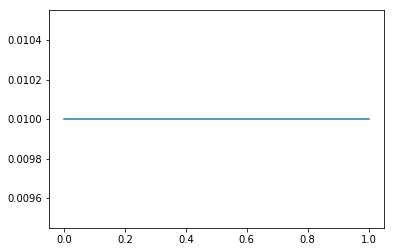

In [22]:
plt.plot(params,prior)

Now, it is time to generate samples based on likelihood distribution which is chosen to be binomial. 

In [23]:
true_theta = 0.8
samples_lk = np.random.binomial(n,true_theta,n_samples)
likelihood = [ np.product(binom(n,theta).pmf(samples_lk)) for theta in params ]

"true_theta" is the true parameters that we want to estimate. So, we need to generate samples base on it. Also, note that likelihood is not a distribution; therefore, it is not needed to be normalized.

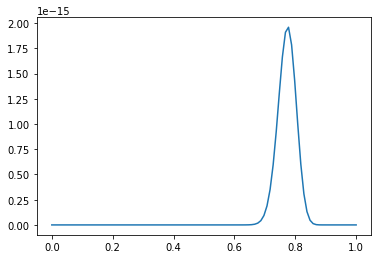

In [24]:
plt.plot(params,likelihood)

<p style='text-align:justify'>Now, let's calculate the posterior from prior and likelihood using Bayes rule. Note that in this case we do not have to calculate p(x) (denominator of the Bayes formula) since we can calculate the product of likelihood and prior for all parameter values and then normalize by dividing by its sum.</p>

In [25]:
postrior = [prior[i]*likelihood[i] for i in range(len(prior))]
postrior /= np.sum(postrior)

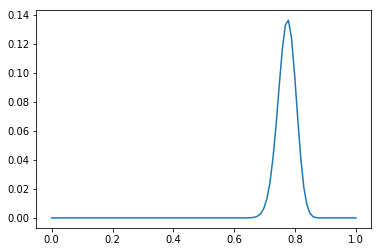

In [26]:
plt.plot(params,postrior)

Interesting! Posterior peaks exactly at where likelihood peaks. The reason is that because the prior is uniform, the posterior must follow what likelihood dictates. In other words, since we do not have any prejudice, only the data dictates what the posterior must be.

It is also worth to look at the effect of number of samples. In the previous example n_samples=20. Now let's increase it to 200. 

Text(0.5,1,'Postrior Distribution')

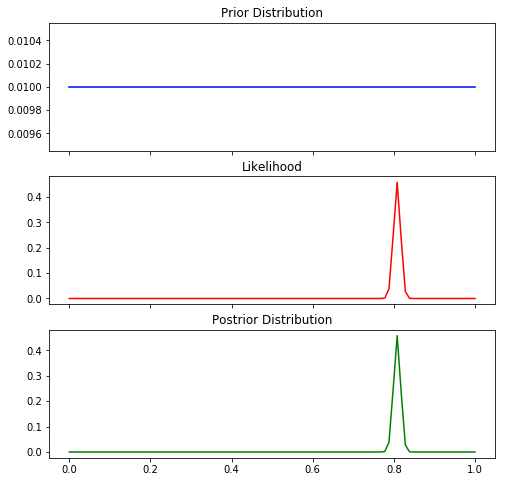

In [27]:
n_samples = 200
prior_samples = np.random.randint(0,n+1,n_samples)
prior = [ np.product(randint(0,n+1).pmf(prior_samples)) for theta in params ]
prior = prior/np.sum(prior)
true_theta = 0.8
samples_lk = np.random.binomial(n,true_theta,n_samples)
likelihood = [ np.product(binom(n,theta).pmf(samples_lk)) for theta in params ]
postrior = [prior[i]*likelihood[i] for i in range(len(prior))]
postrior /= np.sum(postrior)

fix,axes = plt.subplots(3,1,sharex=True,figsize=(8,8))

axes[0].plot(params,prior,'b')
axes[0].set_title("Prior Distribution")
axes[1].plot(params,likelihood/np.sum(likelihood),'r')
axes[1].set_title("Likelihood")
axes[2].plot(params,postrior,'g')
axes[2].set_title("Postrior Distribution")

Fantastic! As the number of samples grow the likelihood and distributions narow down. The intuition is that more data makes them more confident about the actual parameter value. 

Now, it is time to put everything together in an interactive code block so that you can change the value of <font color='blue'>true_theta</font> and <font color='blue'>n_samples</font> interactively and see the effet.

In [28]:
def BayesRule(n_samples=6,true_theta=.5):

    prior_samples = np.random.randint(0,n+1,n_samples)
    prior = [ np.product(randint(0,n+1).pmf(prior_samples)) for theta in params ]
    prior = prior/np.sum(prior)
    samples_lk = np.random.binomial(n,true_theta,n_samples)
    likelihood = [ np.product(binom(n,theta).pmf(samples_lk)) for theta in params ]
    postrior = [prior[i]*likelihood[i] for i in range(len(prior))]
    postrior /= np.sum(postrior)

    fix,axes = plt.subplots(3,1,sharex=True,figsize=(8,8))

    axes[0].plot(params,prior,'b')
    axes[0].set_title("Prior Distribution")
    axes[1].plot(params,likelihood/np.sum(likelihood),'r')
    axes[1].set_title("Likelihood")
    axes[2].plot(params,postrior,'g')
    axes[2].set_title("Postrior Distribution")

In [29]:
interactive_plot = interactive(BayesRule,n_samples=(1,30,5),true_theta=(0,1,.1))
print(interactive_plot.children)
output = interactive_plot.children[-1]
interactive_plot

(IntSlider(value=6, description='n_samples', max=30, min=1, step=5), FloatSlider(value=0.5, description='true_theta', max=1.0), Output())


interactive(children=(IntSlider(value=6, description='n_samples', max=30, min=1, step=5), FloatSlider(value=0.…

Now, let's change prior from uniform to binomial so that we can get a sense of the prior effect as well. 

Text(0.5,1,'Postrior Distribution')

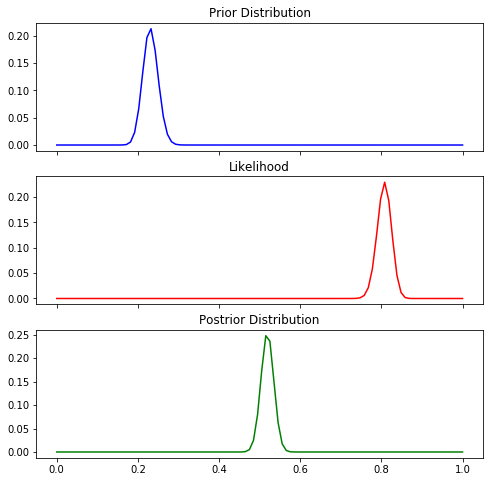

In [30]:
n_samples = 50
prior_theta = 0.2
prior_samples = np.random.binomial(n,prior_theta,n_samples)
prior = [ np.product(binom(n,theta).pmf(prior_samples)) for theta in params ]
prior = prior/np.sum(prior)
prior = prior/np.sum(prior)
true_theta = 0.8
samples_lk = np.random.binomial(n,true_theta,n_samples)
likelihood = [ np.product(binom(n,theta).pmf(samples_lk)) for theta in params ]
postrior = [prior[i]*likelihood[i] for i in range(len(prior))]
postrior /= np.sum(postrior)

fix,axes = plt.subplots(3,1,sharex=True,figsize=(8,8))

axes[0].plot(params,prior,'b')
axes[0].set_title("Prior Distribution")
axes[1].plot(params,likelihood/np.sum(likelihood),'r')
axes[1].set_title("Likelihood")
axes[2].plot(params,postrior,'g')
axes[2].set_title("Postrior Distribution")

<p style='text-align:justify'> Great! Prior's parameter is chosen to be 0.2. It means that we belive 2 out ot 10 people use the app. But, samples (red plot) show something different. It is saying that based on the data 8 of 10 people use the app. Look at postrior! It is an updated verson of prior by the force of data (likelihood). It lies between prior and likelihood.</>

The following is an interactive code block so that you can see the effect of three parameters:
- Prior's parameter (prior_theta)
- likelihood parameter (true_theta)
- n_samples

In [31]:
def BayesRule(n_samples=20,true_theta=0.8,prior_theta=0.2):

    prior_samples = np.random.binomial(n,prior_theta,n_samples)
    prior = [ np.product(binom(n,theta).pmf(prior_samples)) for theta in params ]
    prior = prior/np.sum(prior)
    samples_lk = np.random.binomial(n,true_theta,n_samples)
    likelihood = [ np.product(binom(n,theta).pmf(samples_lk)) for theta in params ]
    postrior = [prior[i]*likelihood[i] for i in range(len(prior))]
    postrior /= np.sum(postrior)

    fix,axes = plt.subplots(3,1,sharex=True,figsize=(8,8))

    axes[0].plot(params,prior,'b')
    axes[0].set_title("Prior Distribution")
    axes[1].plot(params,likelihood/np.sum(likelihood),'r')
    axes[1].set_title("Likelihood")
    axes[2].plot(params,postrior,'g')
    axes[2].set_title("Postrior Distribution")

In [32]:
interactive_plot = interactive(BayesRule,n_samples=(1,30,5),true_theta=(0,1,.1),prior_theta=(0,1,0.1))
print(interactive_plot.children)
output = interactive_plot.children[-1]
interactive_plot

(IntSlider(value=20, description='n_samples', max=30, min=1, step=5), FloatSlider(value=0.8, description='true_theta', max=1.0), FloatSlider(value=0.2, description='prior_theta', max=1.0), Output())


interactive(children=(IntSlider(value=20, description='n_samples', max=30, min=1, step=5), FloatSlider(value=0…